In [11]:
import pandas as pd
import numpy as np

# load datasets
content = pd.read_csv('./Content.csv', index_col=0)
reaction = pd.read_csv('./Reactions.csv', index_col=0)
reaction_types = pd.read_csv('./ReactionTypes.csv', index_col=0)

In [12]:
content.head(5)

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [13]:
reaction.head(5)

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25


In [14]:
# merge reaction and conent tables based on content ID
df_merged = pd.merge(reaction, content, on='Content ID', how='left')

In [15]:
reaction_types.head(5)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [16]:
# Rename the 'type' column to 'Reaction Type' in df_reaction_types
reaction_types.rename(columns={'Type': 'Reaction Type'}, inplace=True)


In [17]:
reaction_types.head(5)

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [18]:
# Merge the above result with Reaction Types table on Reaction Type
final_df = pd.merge(df_merged, reaction_types, on='Reaction Type', how='left')

In [19]:
final_df.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/2020 9:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/2021 12:22,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/2021 5:13,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/2021 19:13,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/2020 12:25,photo,Studying,positive,30


In [20]:
# Group by 'Category' and sum the 'Score'
category_scores = final_df.groupby('Category')['Score'].sum()

# Sort the scores in descending order
sorted_scores = category_scores.sort_values(ascending=False)

# Get the top 5 categories
top_5_categories = sorted_scores.head(5)

# Display the top 5 categories
print(top_5_categories)

Category
animals           71242
healthy eating    69067
technology        68521
science           66549
culture           64952
Name: Score, dtype: int64


In [21]:
# Save the final df to csv file
final_df.to_csv('final_data.csv', index=False)

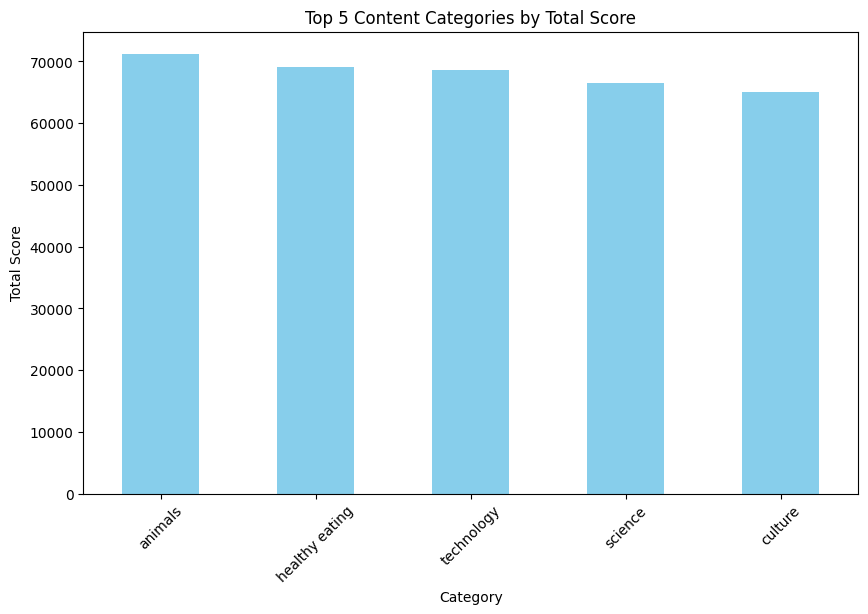

In [22]:
import matplotlib.pyplot as plt

# Load final df
final_df = pd.read_csv('./final_data.csv')

# Group by 'Category' and sum the 'Score'
category_scores = final_df.groupby('Category')['Score'].sum()

# Sort the scores in descending order and get the top 5 categories
top_5_categories = category_scores.sort_values(ascending=False).head(5)

# Plotting the top 5 categories in a bar chart
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Content Categories by Total Score')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.xticks(rotation=45)
plt.show()


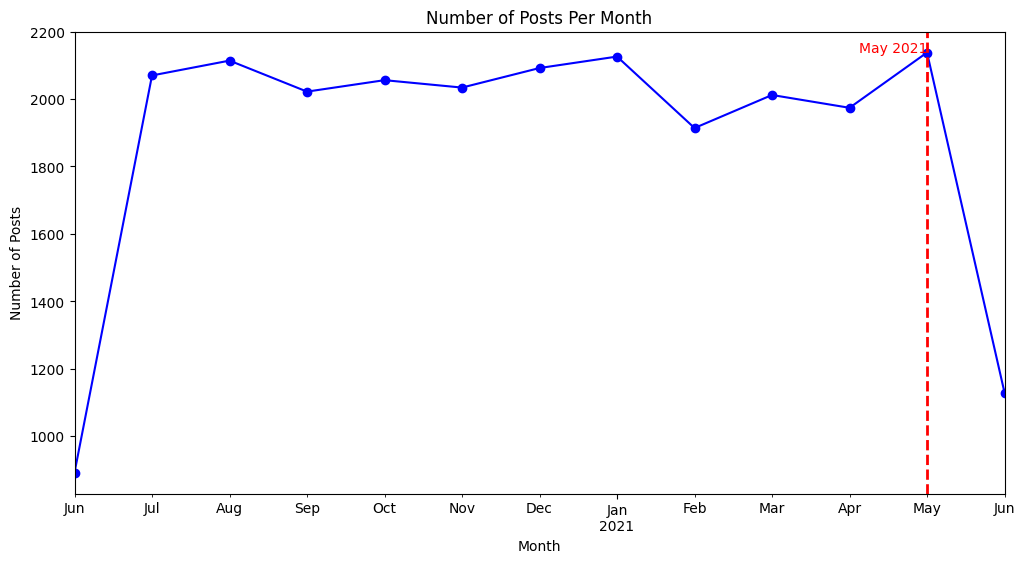

In [23]:
final_df['Datetime'] = pd.to_datetime(final_df['Datetime'])
final_df['Month'] = final_df['Datetime'].dt.to_period('M')

# Count the number of posts per month
posts_per_month = final_df.groupby('Month').size()

# Plotting the time series
plt.figure(figsize=(12, 6))
posts_per_month.plot(kind='line', marker='o', color='blue')
plt.title('Number of Posts Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Posts')

# Highlight May 2021
plt.axvline(x=pd.Period('2021-05'), color='red', linestyle='--', lw=2)
plt.text(pd.Period('2021-05'), posts_per_month.max(), 'May 2021', color='red', ha='right')

plt.show()


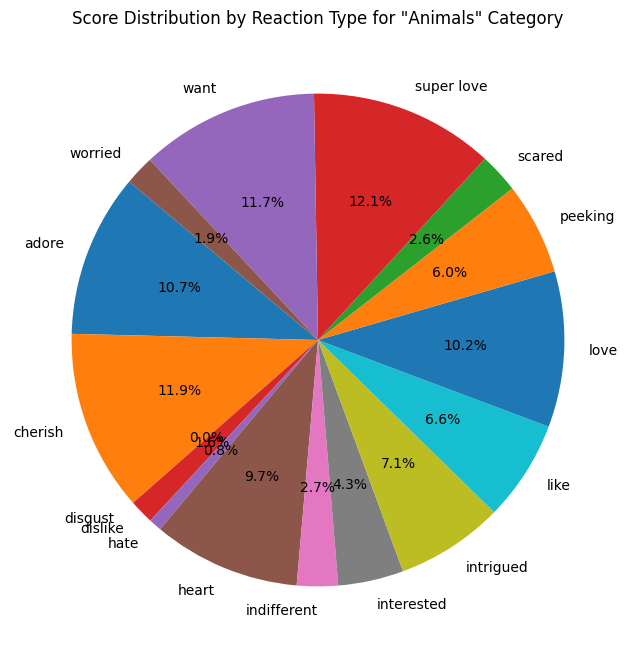

In [25]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'animals' category
animals_df = final_df[final_df['Category'] == 'animals']

# Group by 'Reaction Type' and sum the 'Score'
reaction_scores = animals_df.groupby('Reaction Type')['Score'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the size as needed
plt.pie(reaction_scores, labels=reaction_scores.index, autopct='%1.1f%%', startangle=140)
plt.title('Score Distribution by Reaction Type for "Animals" Category')
plt.show()
